## 初期設定

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import glob

from select_datasets import Select_datasets as my_SD

from visualize import visualization
myvs = visualization()

In [3]:
# Constant

f_s = 12.5*10**3
th_s = 2
N = 4096
pixel_number=36

f_range = f_s/th_s
f_resolution = f_range/N

In [4]:
#sample_data

path="/data7/ALL/db/ns/8k"
npz_files = glob.glob(path+"/**.npz")

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set1").colors)

d = np.load(npz_files[3])

D_df = pd.DataFrame(d["arr_0"]).T

## データ取得,加工

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
min_freq = 0.1
max_freq = 15

start = math.ceil(min_freq/f_resolution)-1
stop = math.ceil(max_freq/f_resolution)-1

x = np.arange(start+1,stop+1)*f_resolution
D_df_limfreq = D_df.iloc[:,start:stop]

print(start,stop)

0 9


In [7]:
myds = my_SD("/data7/ALL/db/ns/8k")

data_df = myds.concat_npz()

In [8]:
df_data_pre = data_df.iloc[:,start:stop]
df_data_pre.replace(0, np.nan, inplace=True)

/tmp/ipykernel_2853190/952979149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_pre.replace(0, np.nan, inplace=True)


In [9]:
df_data_pre=df_data_pre.dropna(axis=0,how="all")
df_data_pre=df_data_pre.dropna(0)
df_data_pre.index = list(range(0,len(df_data_pre)))
df_data_pre

/tmp/ipykernel_2853190/3792735466.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df_data_pre=df_data_pre.dropna(0)


0           1           2           3           4  \
0       172.896067  176.513317  251.178517  237.754544  296.303427   
1        75.659870  120.790621  169.793157  125.246630  179.171441   
2        96.913210  113.915134  121.180175  122.038119  161.548251   
3       126.852502  116.382145  156.818553  166.869081  215.471876   
4       152.509383   80.845047  142.408379  100.871204  170.583987   
...            ...         ...         ...         ...         ...   
103606  122.093491  116.433336  145.048783  114.312061  192.500221   
103607  104.721016  133.593078  151.468548  248.887670  189.338949   
103608   46.706180  152.973006  166.045044  166.933334  203.486829   
103609  105.969081  152.464743  240.822518  264.686312  293.389996   
103610  144.451794   98.450465  165.335247  225.233102  234.669472   

                 5           6           7           8  
0       458.932187  292.656312  307.286854  387.060255  
1       172.916762  365.257365  228.995861  334.066903  
2       175.660607  169.937570  264.225008  296.083163  
3       246.746340  190.952035  221.437342  354.225474  
4       265.994181  350.298726  220.398215  326.459230  
...            ...         ...         ...         ...  
103606  288.475542  235.521077  326.818310  325.784505  
103607  276.713913  191.168293  400.484528  327.071259  
103608  321.153870  251.722031  296.447174  325.160645  
103609  274.296324  175.683277  307.671430  405.552416  
103610  219.059660  341.781429  401.365567  312.127433  

[103611 rows x 9 columns]

### train test split

In [10]:
df_test =  df_data_pre.sample(frac=0.01,random_state=0)
df_train = df_data_pre[~df_data_pre.index.isin(df_test.index)]

In [11]:
df_train.index = range(len(df_train))
df_train

0           1           2           3           4  \
0       172.896067  176.513317  251.178517  237.754544  296.303427   
1        75.659870  120.790621  169.793157  125.246630  179.171441   
2        96.913210  113.915134  121.180175  122.038119  161.548251   
3       126.852502  116.382145  156.818553  166.869081  215.471876   
4       152.509383   80.845047  142.408379  100.871204  170.583987   
...            ...         ...         ...         ...         ...   
102570  122.093491  116.433336  145.048783  114.312061  192.500221   
102571  104.721016  133.593078  151.468548  248.887670  189.338949   
102572   46.706180  152.973006  166.045044  166.933334  203.486829   
102573  105.969081  152.464743  240.822518  264.686312  293.389996   
102574  144.451794   98.450465  165.335247  225.233102  234.669472   

                 5           6           7           8  
0       458.932187  292.656312  307.286854  387.060255  
1       172.916762  365.257365  228.995861  334.066903  
2       175.660607  169.937570  264.225008  296.083163  
3       246.746340  190.952035  221.437342  354.225474  
4       265.994181  350.298726  220.398215  326.459230  
...            ...         ...         ...         ...  
102570  288.475542  235.521077  326.818310  325.784505  
102571  276.713913  191.168293  400.484528  327.071259  
102572  321.153870  251.722031  296.447174  325.160645  
102573  274.296324  175.683277  307.671430  405.552416  
102574  219.059660  341.781429  401.365567  312.127433  

[102575 rows x 9 columns]

In [12]:
df_test.index = range(len(df_test))
df_test

0           1           2           3           4           5  \
0     152.504368  170.335356  190.833575  213.278968  234.313393  247.938295   
1     143.215323  149.195565  162.199715  191.276903  225.023724  249.164230   
2      79.588408  113.260839  131.283536  185.410671  270.704693  232.712932   
3      79.183887  114.590040  103.338366  216.582015  202.298879  280.078681   
4     142.515212   94.231278  124.657704  246.721447  249.131802  312.044966   
...          ...         ...         ...         ...         ...         ...   
1031  508.214365  153.729956  365.181752  270.713530  282.297200  426.071971   
1032  146.717977  169.912794  144.263111  197.961869  209.644622  265.332971   
1033  137.926629  179.855153  192.075634  215.820869  240.432649  266.296584   
1034  177.189014  128.701611  144.535110  152.239627  179.117766  200.660449   
1035  157.621785  164.005525  181.784723  200.855316  223.037576  257.278752   

               6           7           8  
0     294.852763  321.899862  319.527939  
1     288.551738  289.337118  351.636123  
2     212.825214  355.991236  323.537063  
3     157.349704  363.575764  372.853429  
4     376.143128  439.468184  354.913261  
...          ...         ...         ...  
1031  269.350912  329.139771  421.720473  
1032  308.308020  374.328990  388.977082  
1033  278.930101  298.998721  361.470487  
1034  160.782929  205.620021  187.016780  
1035  275.673473  310.748927  285.832041  

[1036 rows x 9 columns]

In [13]:
sc = StandardScaler()
sc.fit(df_train)
df_train_std = pd.DataFrame(sc.transform(df_train))
df_train_std

0         1         2         3         4         5         6  \
0       0.068014  0.064110  0.599946  0.254002  0.523553  1.430775  0.037268   
1      -0.408007 -0.377531 -0.110914 -0.660389 -0.417646 -0.628985  0.539368   
2      -0.303961 -0.432025 -0.535525 -0.686466 -0.559255 -0.609225 -0.811439   
3      -0.157393 -0.412472 -0.224241 -0.322109 -0.125959 -0.097296 -0.666106   
4      -0.031789 -0.694128 -0.350107 -0.858497 -0.486650  0.041319  0.435916   
...          ...       ...       ...       ...       ...       ...       ...   
102570 -0.180691 -0.412066 -0.327044 -0.749258 -0.310544  0.203220 -0.357872   
102571 -0.265738 -0.276063 -0.270971  0.344485 -0.335946  0.118518 -0.664610   
102572 -0.549750 -0.122463 -0.143652 -0.321586 -0.222263  0.438555 -0.245828   
102573 -0.259628 -0.126492  0.509492  0.472886  0.500142  0.101107 -0.771702   
102574 -0.071235 -0.554593 -0.149852  0.152236  0.028301 -0.296684  0.377011   

               7         8  
0      -0.061786  0.179774  
1      -0.545583 -0.115955  
2      -0.327886 -0.327924  
3      -0.592291 -0.003461  
4      -0.598712 -0.158410  
...          ...       ...  
102570  0.058908 -0.162175  
102571  0.514126 -0.154995  
102572 -0.128770 -0.165657  
102573 -0.059410  0.282969  
102574  0.519570 -0.238389  

[102575 rows x 9 columns]

In [14]:
List_train_data = df_train.values.tolist()
List_test_data = df_test.values.tolist()

## KMeansによる正常サンプルの取得

In [15]:
from sklearn.cluster import MiniBatchKMeans

In [16]:
n_cluster = 3
df_data_Mini = pd.DataFrame()

In [17]:
MiniB = MiniBatchKMeans(init="random",n_clusters=n_cluster,random_state=0)

MiniB.fit(df_train_std)

df_data_Mini["clusters"]=MiniB.predict(df_train_std)
df_data_Mini

clusters
0              2
1              0
2              0
3              0
4              0
...          ...
102570         0
102571         0
102572         0
102573         2
102574         0

[102575 rows x 1 columns]

In [18]:
df_Mini_normal_data = df_train[df_train.index.isin(df_data_Mini[df_data_Mini["clusters"]==1].index)]
df_Mini_normal_data

0            1            2            3            4  \
691      212.509083   239.920022   285.973215   553.345754   387.716636   
692      218.500410   264.179699   330.792781   610.578207   402.160115   
1000     478.352071   557.219567   546.570164   522.597343   798.987413   
1006     471.663077   562.602490   596.745760   613.801781   748.227968   
1007     430.837523   501.077446   498.767060   464.219250   717.329784   
...             ...          ...          ...          ...          ...   
102007   276.836408   280.302164   395.161414   547.860413   531.612355   
102009  1260.303673  1332.682892  1976.530449  2883.308561  2455.287947   
102010  1447.676522  1492.506176  2113.916597  3491.706525  3145.255492   
102018   269.427947   349.206096   461.077743   656.585757   568.022418   
102112   206.028561   663.583881   393.290410   271.244841   344.497342   

                  5            6            7            8  
691      402.940990   489.473822   687.709912   524.741117  
692      423.280847   510.206579   834.399210   568.366944  
1000     755.119479   749.017363   784.135486   708.770382  
1006     810.413516   713.190067   823.059133   688.207965  
1007     648.272049   579.622823   656.107098   568.563300  
...             ...          ...          ...          ...  
102007   525.980326   676.802659   731.243258   645.206321  
102009  2663.592661  3425.311827  3638.549566  3379.654282  
102010  3542.142030  4232.953691  4544.599544  4285.530524  
102018   700.332498   781.057839   841.523330   950.945822  
102112   596.312482   420.228251   422.531743   448.765834  

[1777 rows x 9 columns]

In [19]:
df_Mini_train = df_Mini_normal_data.sample(frac=0.8,random_state=0)
df_Mini_test = df_train[~df_train.index.isin(df_train.index)]

In [20]:
df_train_std = df_train_std[df_train_std.index.isin(df_train.index)]
df_test_std = df_train_std[~df_train_std.index.isin(df_train.index)]

In [21]:
List_train = df_train.values.tolist()
List_test = df_test.values.tolist()

In [22]:
List_train_std = df_train_std.values.tolist()
List_test_std = df_test_std.values.tolist()

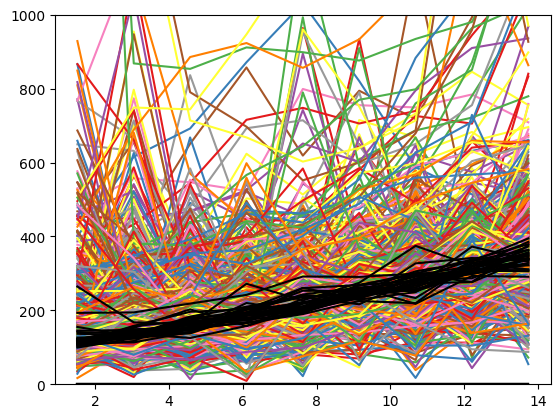

In [23]:
myvs.show_multiple_figure_TwoSorce(x,List_train[::40],D_df_limfreq.values.tolist())

## One Class SVM

In [22]:
from sklearn.svm import OneClassSVM

In [ ]:
ocsvm = OneClassSVM()

In [26]:
ocsvm.fit(List_test_std[0:20000])

OneClassSVM()

In [30]:
df_unsu_ocsvm_result = ocsvm.predict(List_train_std)

In [36]:
df_unsu_ocsvm_result = pd.DataFrame(df_unsu_ocsvm_result)
df_unsu_ocsvm_result.index = df_test.index
df_unsu_ocsvm_result

0
0      -1
3       1
5      -1
8      -1
9      -1
...    ..
103600  1
103601 -1
103603  1
103607  1
103609 -1

[62256 rows x 1 columns]

In [37]:
df_unsp_ocsvm_normal = df_train[df_train.index.isin(df_unsu_ocsvm_result[df_unsu_ocsvm_result[0]==1].index)]
List_unsp_ocsvm_normal = df_unsp_ocsvm_normal.values.tolist()

In [38]:
len(List_unsp_ocsvm_normal)

30219

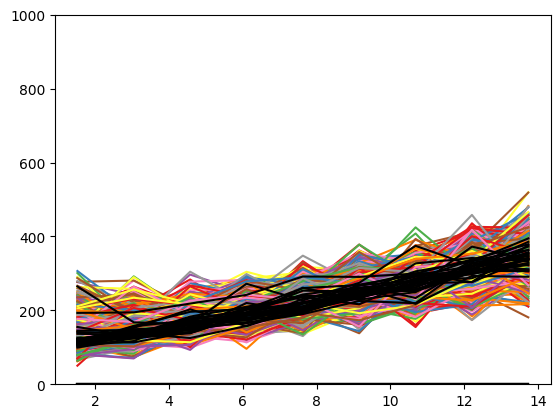

In [40]:
myvs.show_multiple_figure_TwoSorce(x,List_unsp_ocsvm_normal[::30],D_df_limfreq.values.tolist())

In [41]:
df_unsp_ocsvm_abnormal = df_train[df_train.index.isin(df_unsu_ocsvm_result[df_unsu_ocsvm_result[0]==-1].index)]
List_unsp_ocsvm_abnormal = df_unsp_ocsvm_abnormal.values.tolist()

In [42]:
len(List_unsp_ocsvm_abnormal)

32037

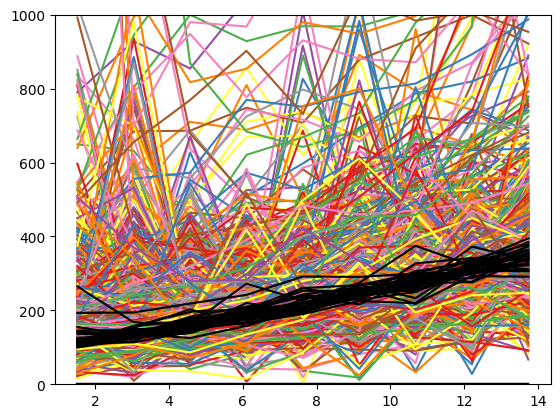

In [43]:
myvs.show_multiple_figure_TwoSorce(x,List_unsp_ocsvm_abnormal[::30],D_df_limfreq.values.tolist())

(0.0, 1000.0)

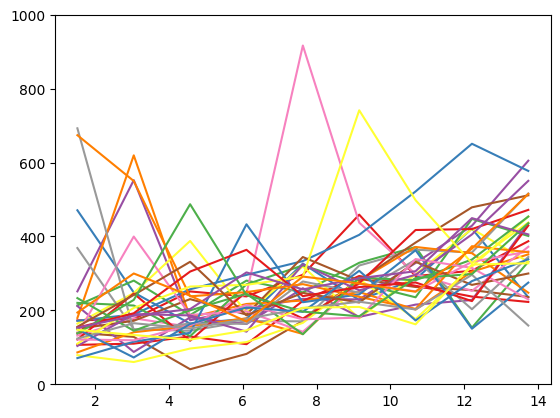

In [48]:
fig,ax = plt.subplots()
for i in List_unsp_ocsvm_abnormal[::1000]:
    ax.plot(x,i)
ax.set_ylim([0,1000])

- パラメータの調節が必要そう

## LOF

In [49]:
from sklearn.neighbors import LocalOutlierFactor

In [77]:
lof = LocalOutlierFactor(novelty=True)

In [78]:
lof.fit(List_train_std)

LocalOutlierFactor(novelty=True)

In [79]:
df_unsp_lof_result = pd.DataFrame(lof.predict(List_test_std))

In [80]:
df_unsp_lof_result.index = df_test.index

In [81]:
df_unsp_lof_normal = df_train[df_train.index.isin(df_unsp_lof_result[df_unsp_lof_result[0]==1].index)]
List_unsp_log_normal = df_unsp_lof_normal.values.tolist()

In [82]:
len(List_unsp_log_normal)

47354

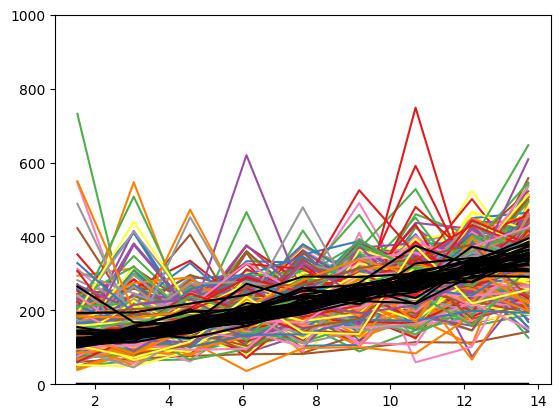

In [83]:
myvs.show_multiple_figure_TwoSorce(x,List_unsp_log_normal[::40],D_df_limfreq.values.tolist())

In [84]:
df_unsp_lof_abnormal = df_train[df_train.index.isin(df_unsp_lof_result[df_unsp_lof_result[0]==-1].index)]
List_unsp_log_abnormal = df_unsp_lof_abnormal.values.tolist()

In [85]:
len(List_unsp_log_abnormal)

14902

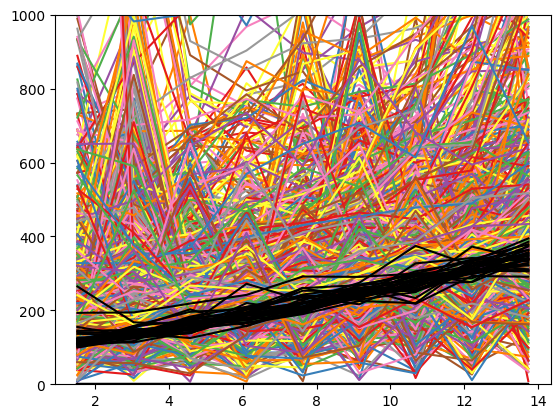

In [89]:
myvs.show_multiple_figure_TwoSorce(x,List_unsp_log_abnormal[::10],D_df_limfreq.values.tolist())

## KNN

In [21]:
from sklearn.neighbors import NearestNeighbors

In [39]:
nn = NearestNeighbors(n_neighbors=3)

In [24]:
nn.fit(List_train_std)

NearestNeighbors(n_neighbors=3)

In [27]:
distances, indices = nn.kneighbors(List_train_std)

In [45]:
df_unsp_KNN_result = pd.DataFrame((start-stop)*np.log(pd.DataFrame(distances)[2]))
df_unsp_KNN_result.index = df_train_std.index
df_unsp_KNN_result.columns = [0]
df_unsp_KNN_result

0
1        6.677365
2       10.869137
4        5.847456
6       12.894324
7        8.708511
...           ...
103604   7.758429
103605   8.167194
103606   9.778741
103608   8.763437
103610   9.429642

[41355 rows x 1 columns]

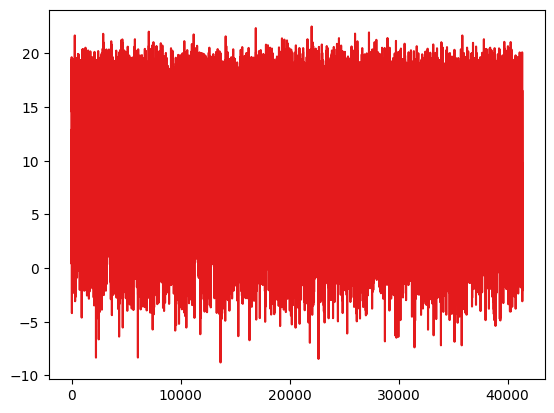

In [41]:
fig,ax = plt.subplots()
ax.plot(range(len(df_unsp_KNN_result)),df_unsp_KNN_result)

(array([0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 5.000e+00, 4.000e+00, 6.000e+00, 3.000e+00, 8.000e+00,
        1.500e+01, 1.900e+01, 3.700e+01, 4.000e+01, 4.800e+01, 7.200e+01,
        6.900e+01, 1.110e+02, 1.050e+02, 1.280e+02, 1.290e+02, 1.360e+02,
        1.650e+02, 1.660e+02, 1.760e+02, 1.830e+02, 1.840e+02, 2.300e+02,
        2.320e+02, 2.320e+02, 3.330e+02, 3.450e+02, 4.560e+02, 5.240e+02,
        6.450e+02, 7.930e+02, 8.740e+02, 1.095e+03, 1.274e+03, 1.503e+03,
        1.529e+03, 1.727e+03, 1.691e+03, 1.732e+03, 1.600e+03, 1.520e+03,
        1.343e+03, 1.094e+03, 9.660e+02, 7.510e+02, 6.050e+02, 5.730e+02,
        5.320e+02, 5.040e+02, 5.380e+02, 5.490e+02, 6.470e+02, 6.560e+02,
        7.440e+02, 7.810e+02, 1.002e+03, 9.980e+02, 1.039e+03, 1.127e+03,
        1.072e+03, 1.107e+03, 1.027e+03, 9.180e+02, 7.820e+02, 6.070e+02,
        4.830e+02, 3.460e+02, 1.730e+02, 1.300e+02, 6.500e+01, 2.500e+01,
        1.300e+01, 6.000e+00, 2.000e+0

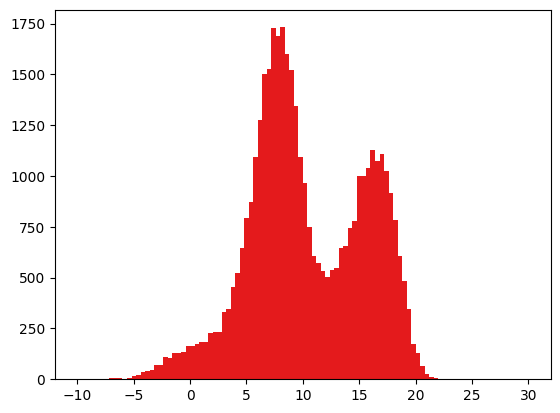

In [38]:
fig,ax = plt.subplots()
ax.hist(df_unsp_KNN_result,bins=100,range=[-10,30])

In [49]:
df_unsp_knn_normal = df_train[df_train.index.isin(df_unsp_KNN_result[df_unsp_KNN_result[0]<20].index)]
List_unsp_knn_normal = df_unsp_knn_normal.values.tolist()

In [50]:
len(List_unsp_knn_normal)

41113

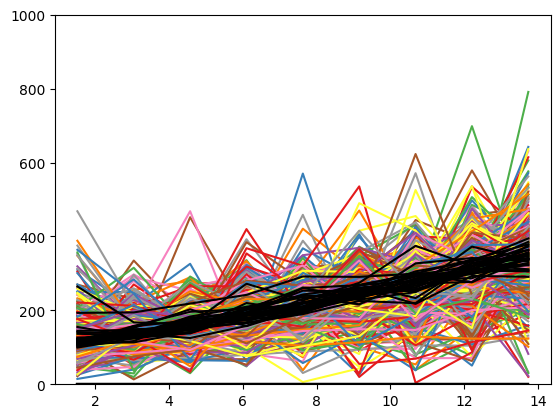

In [51]:
myvs.show_multiple_figure_TwoSorce(x,List_unsp_knn_normal[::40],D_df_limfreq.values.tolist())

In [52]:
df_unsp_knn_normal = df_train[df_train.index.isin(df_unsp_KNN_result[df_unsp_KNN_result[0]<10].index)]
List_unsp_knn_normal =df_unsp_knn_normal.values.tolist()

In [53]:
len(List_unsp_knn_normal)

22586

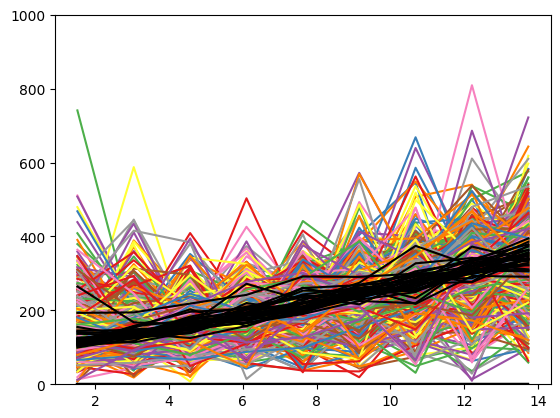

In [55]:
myvs.show_multiple_figure_TwoSorce(x,List_unsp_knn_normal[::20],D_df_limfreq.values.tolist())

### 20-10

In [59]:
df_unsp_knn_normal = df_train[df_train.index.isin(df_unsp_KNN_result[(df_unsp_KNN_result[0]<20) & (df_unsp_KNN_result[0]>10)].index)]
List_unsp_knn_normal =df_unsp_knn_normal.values.tolist()

In [60]:
len(List_unsp_knn_normal)

18527

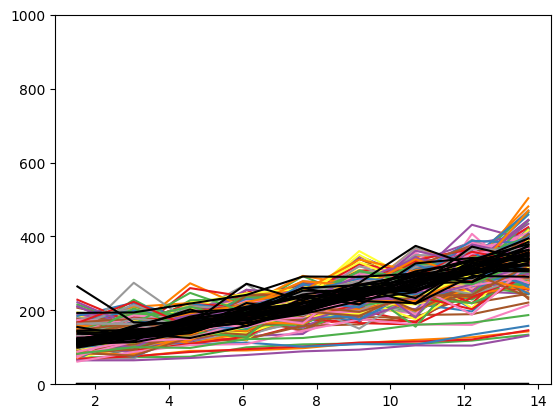

In [61]:
myvs.show_multiple_figure_TwoSorce(x,List_unsp_knn_normal[::20],D_df_limfreq.values.tolist())

### 20<

In [62]:
df_unsp_knn_abnormal = df_train[df_train.index.isin(df_unsp_KNN_result[df_unsp_KNN_result[0]>20].index)]
List_unsp_knn_abnormal =df_unsp_knn_abnormal.values.tolist()

In [63]:
len(List_unsp_knn_abnormal)

242

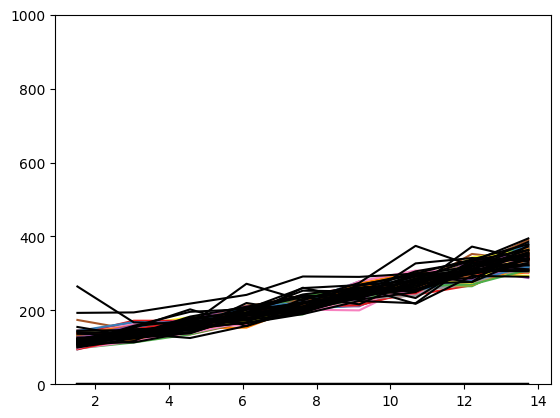

In [65]:
myvs.show_multiple_figure_TwoSorce(x,List_unsp_knn_abnormal[::1],D_df_limfreq.values.tolist())

### 5>

In [66]:
df_unsp_knn_abnormal = df_train[df_train.index.isin(df_unsp_KNN_result[df_unsp_KNN_result[0]<5].index)]
List_unsp_knn_abnormal =df_unsp_knn_abnormal.values.tolist()

In [67]:
len(List_unsp_knn_abnormal)

5182

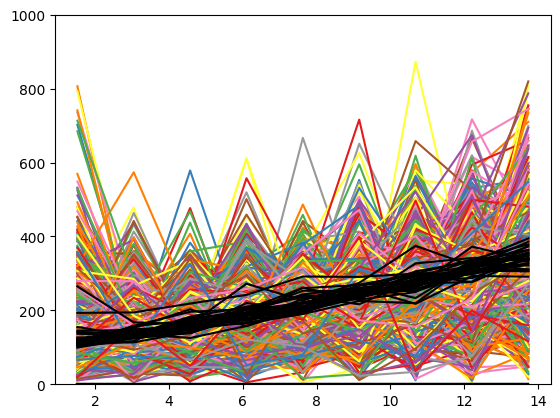

In [68]:
myvs.show_multiple_figure_TwoSorce(x,List_unsp_knn_abnormal[::5],D_df_limfreq.values.tolist())

異常度が逆転してる？